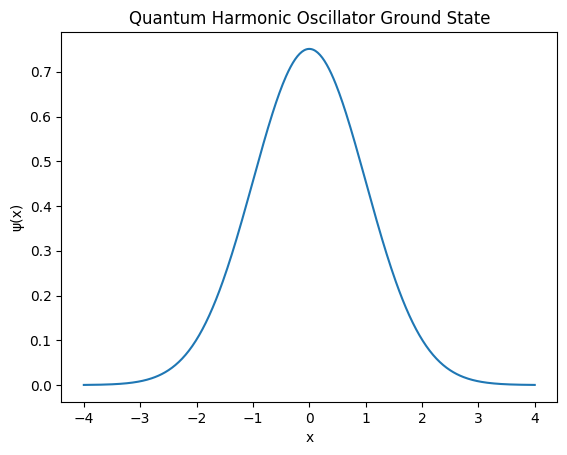

In [2]:
# quantum harmonic oscillator wavefunction (n=0) sampled
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
def quantum_ground_state(x, m=1, w=1, hbar=1):
    alpha = np.sqrt(m*w/hbar)
    psi = (alpha/np.pi**0.25)*np.exp(-0.5*(alpha*x)**2)
    return psi

x_vals = np.linspace(-4,4,400)
psi_vals = quantum_ground_state(x_vals)

plt.plot(x_vals, psi_vals)
plt.title("Quantum Harmonic Oscillator Ground State")
plt.xlabel("x")
plt.ylabel("ψ(x)")
plt.show()

In [3]:
# time evolution of a gaussian wave packet
N = 600
L = 10
dx = L/N
x = np.linspace(-L/2, L/2, N)
k = np.fft.fftfreq(N, d=dx) * 2*np.pi

# initial gaussian packet
x0 = -2
k0 = 5
psi = np.exp(-(x-x0)**2) * np.exp(1j*k0*x)
psi /= np.sqrt(np.sum(np.abs(psi)**2))

dt = 0.002

V = 0.5 * x**2  # harmonic potential

def step(psi):
    psi_half = psi * np.exp(-1j * V * dt/2)
    psi_k = np.fft.fft(psi_half)
    psi_k *= np.exp(-1j * (k**2)/2 * dt)
    psi_new = np.fft.ifft(psi_k)
    psi_new *= np.exp(-1j * V * dt/2)
    return psi_new

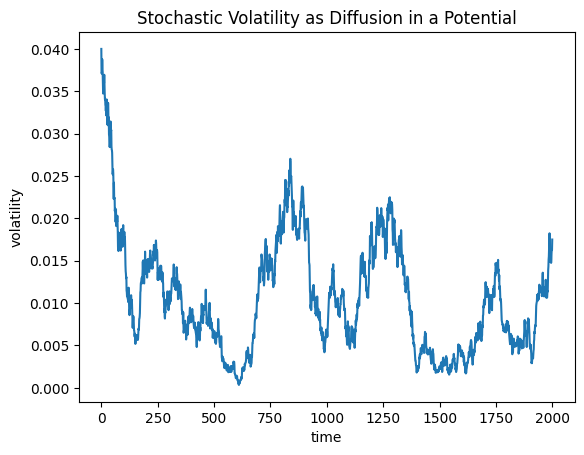

In [4]:
def heston_variance(V0=0.04, kappa=2, theta=0.04, sigma=0.3, T=1, N=2000):
    dt = T/N
    V = np.zeros(N)
    V[0] = V0
    for t in range(1, N):
        dW = np.random.normal()*np.sqrt(dt)
        V[t] = abs(V[t-1] + kappa*(theta-V[t-1])*dt + sigma*np.sqrt(V[t-1])*dW)
    return V

V = heston_variance()

plt.plot(V)
plt.title("Stochastic Volatility as Diffusion in a Potential")
plt.xlabel("time")
plt.ylabel("volatility")
plt.show()


ValueError: operands could not be broadcast together with shapes (600,) (2000,) 

Error in callback <function _draw_all_if_interactive at 0x7158a2e18900> (for post_execute), with arguments args (),kwargs {}:


ValueError: operands could not be broadcast together with shapes (600,) (2000,) 

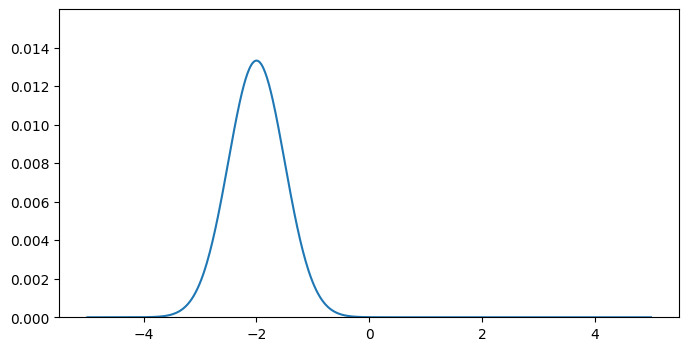

In [5]:
fig, ax = plt.subplots(figsize=(8,4))
line, = ax.plot(x, np.abs(psi)**2)
ax.set_ylim(0, max(np.abs(psi)**2)*1.2)

def update(frame):
    global psi
    psi = step(psi)
    line.set_ydata(np.abs(psi)**2)
    return line,

ani = animation.FuncAnimation(fig, update, frames=300, interval=30)
HTML(ani.to_jshtml())